In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
# We need to work on Recall Score as Employee which is existing and but predicted is left then providing Bad Service 
# So we need to Increase Recall score or Decrease False Negative as much as possible 



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go 
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
sns.set_style('darkgrid')
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
plt.rc('figure',figsize=(20,10))
from imblearn.over_sampling import SMOTE




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df['Exited'].value_counts()
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [7]:
df.describe(include='all')
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = pd.get_dummies(df, drop_first=True)
df = df.astype(int)
df['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

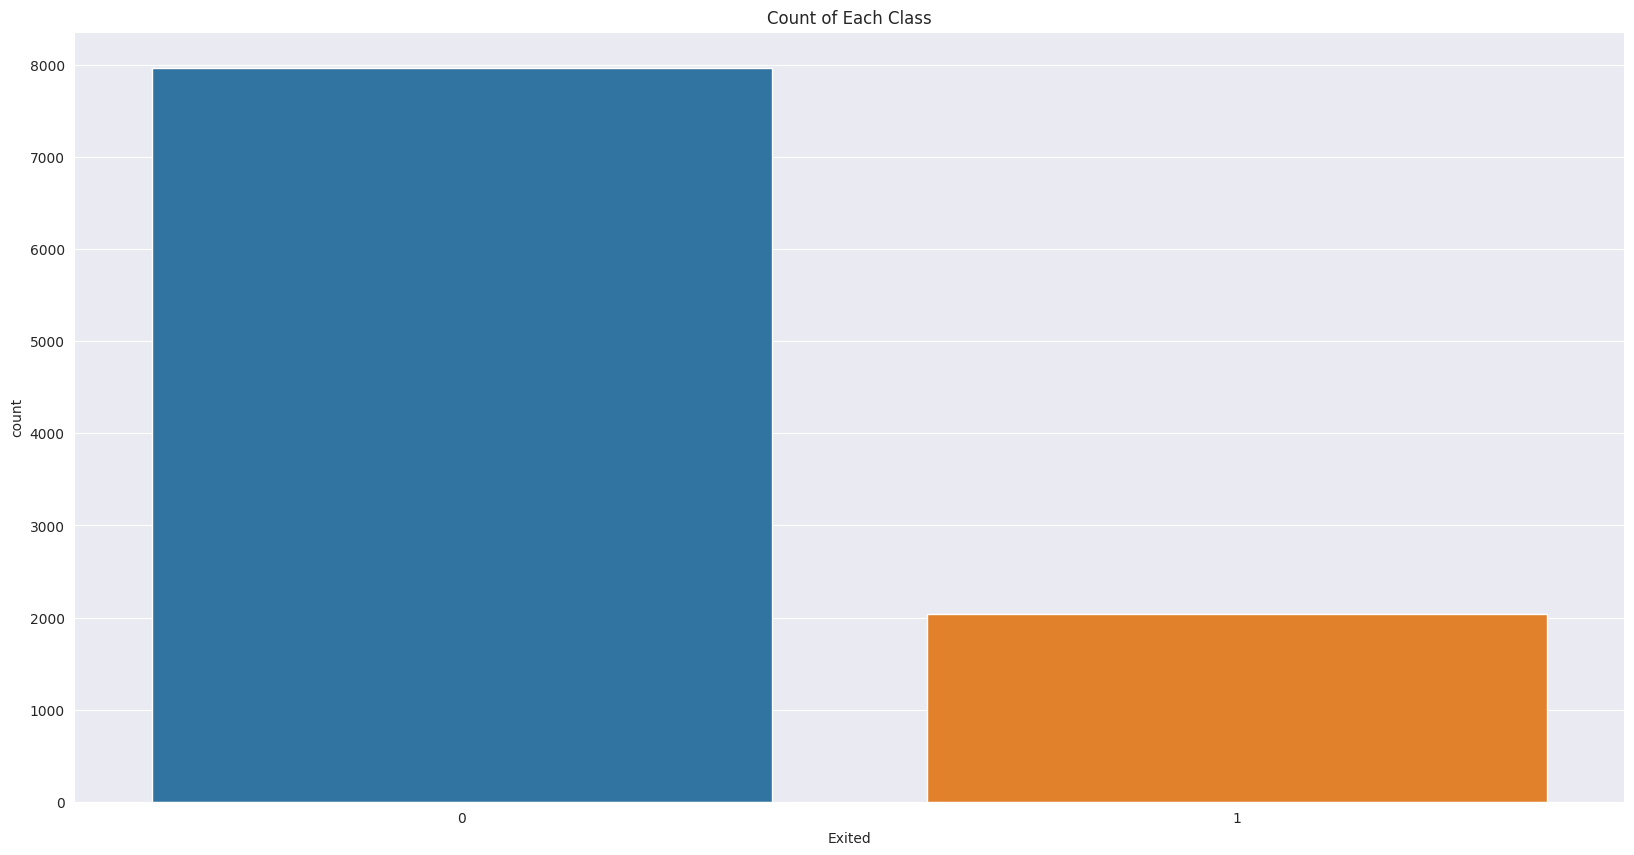

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Exited', data=df)  

plt.title('Count of Each Class')
plt.show()


In [11]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

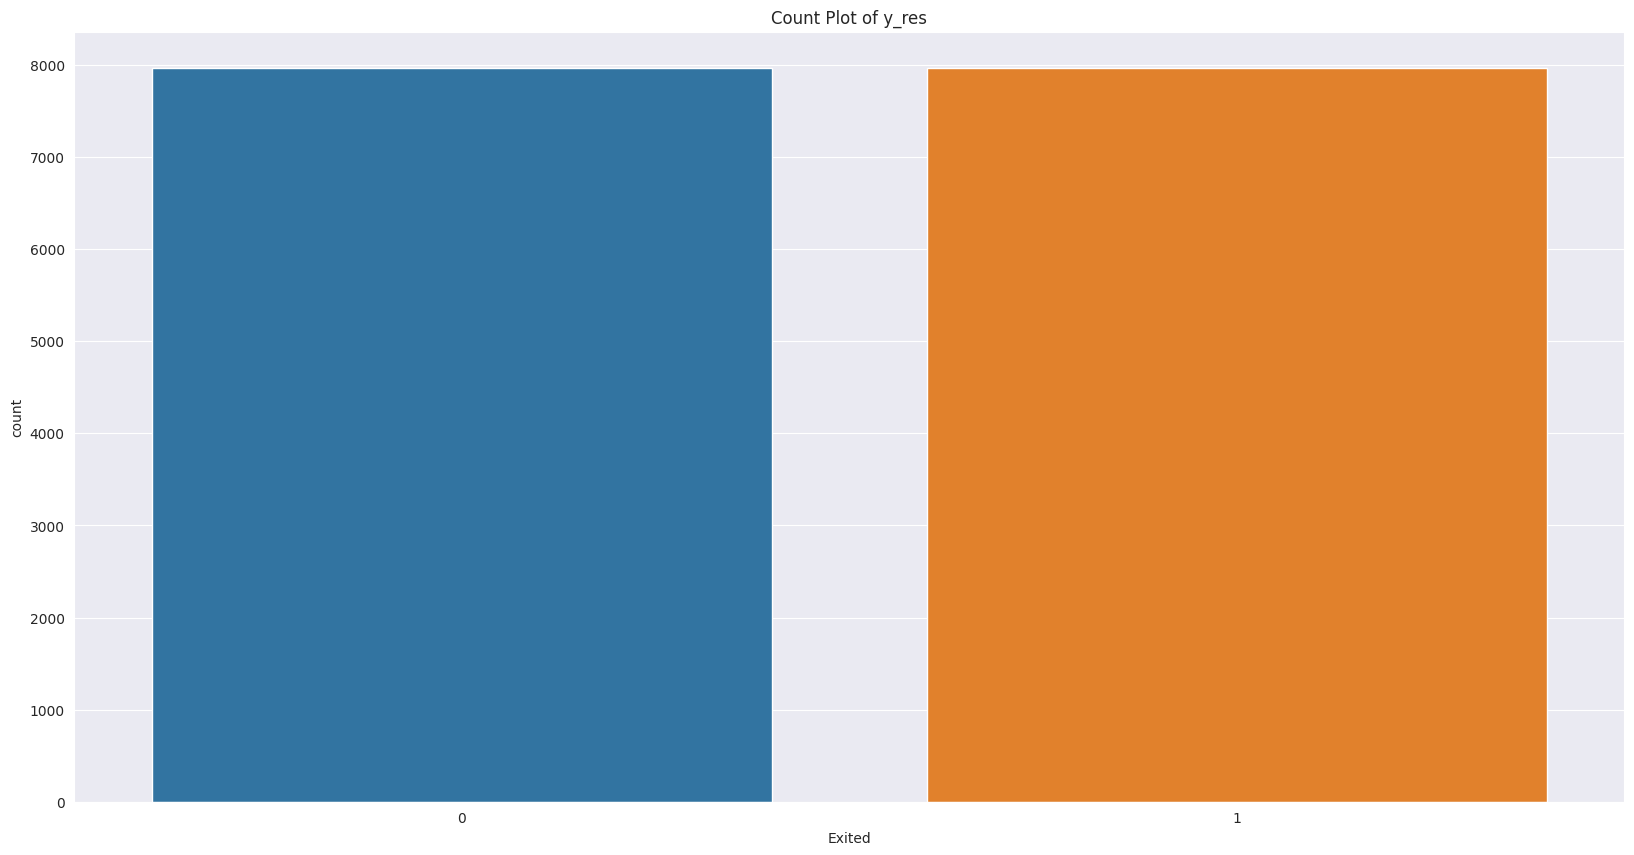

In [12]:
sns.countplot(x=y_res)
plt.title('Count Plot of y_res')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
X_train_v1.var(axis=0)


CreditScore          8.362621e+03
Age                  9.896382e+01
Tenure               7.373204e+00
Balance              3.749177e+09
NumOfProducts        3.236094e-01
HasCrCard            2.347543e-01
IsActiveMember       2.330407e-01
EstimatedSalary      3.285799e+09
Geography_Germany    1.872790e-01
Geography_Spain      1.444629e-01
Gender_Male          2.427392e-01
dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

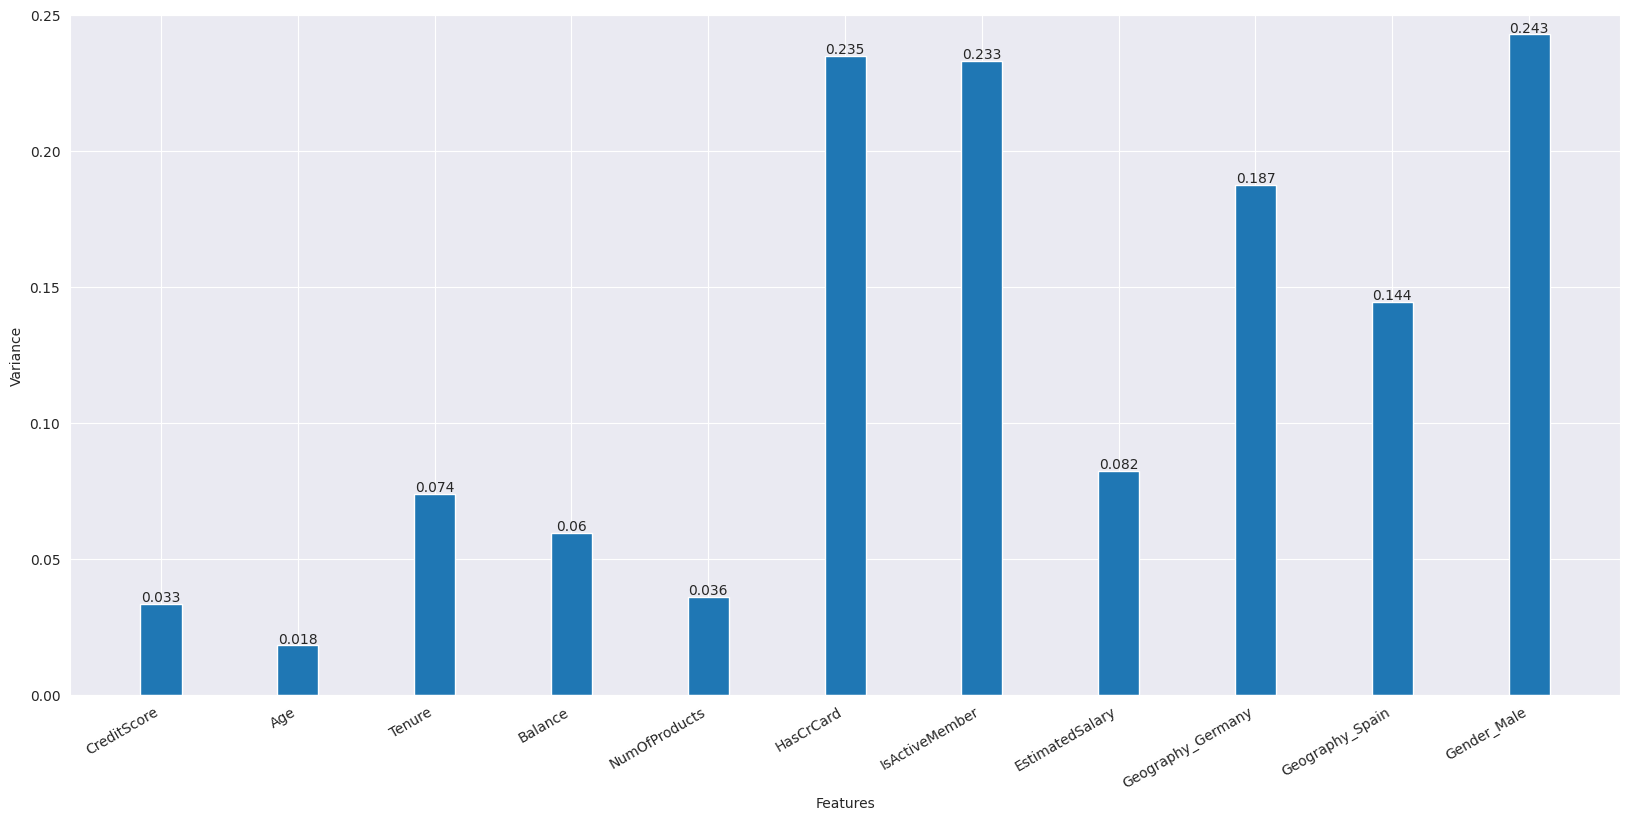

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

x = X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.3)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.25)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')
    
fig.autofmt_xdate()

In [16]:
# Modelling 

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [18]:
y_predicted = model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1633
           1       0.84      0.84      0.84      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
model = AdaBoostClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1633
           1       0.81      0.82      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



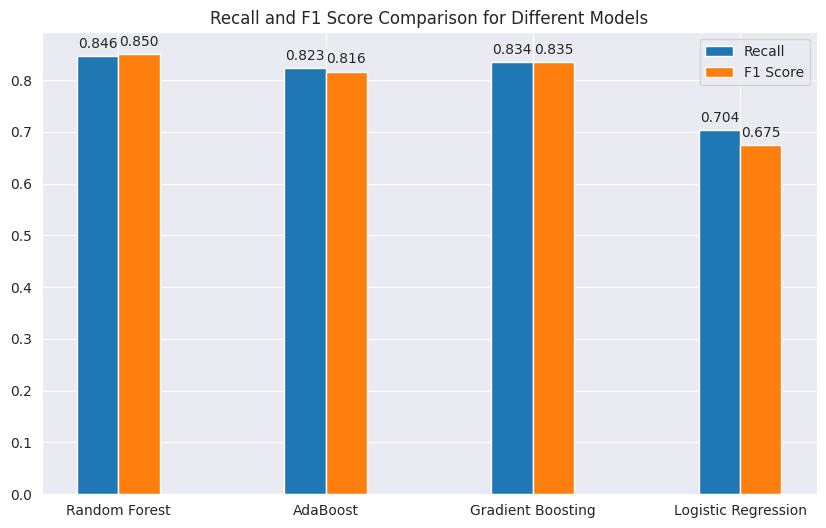

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
}

recall_scores = []
f1_scores = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.20
ind = np.arange(len(models))

bar1 = ax.bar(ind, recall_scores, width, label='Recall')
bar2 = ax.bar(ind + width, f1_scores, width, label='F1 Score')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(models.keys())
ax.legend()

# Add values on top of the bars
for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, f'{height:.3f}', ha='center', va='bottom')

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, f'{height:.3f}', ha='center', va='bottom')

plt.title('Recall and F1 Score Comparison for Different Models')
plt.show()


In [ ]:
#Removing Age 

In [27]:
X1=df.drop(['Exited','Age'],axis=1)
y1=df['Exited']

In [29]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X1,y1)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
X_train_v1.var(axis=0)

CreditScore          8.326369e+03
Tenure               7.406352e+00
Balance              3.737589e+09
NumOfProducts        3.246470e-01
HasCrCard            2.352736e-01
IsActiveMember       2.331632e-01
EstimatedSalary      3.292143e+09
Geography_Germany    1.858156e-01
Geography_Spain      1.451757e-01
Gender_Male          2.437092e-01
dtype: float64

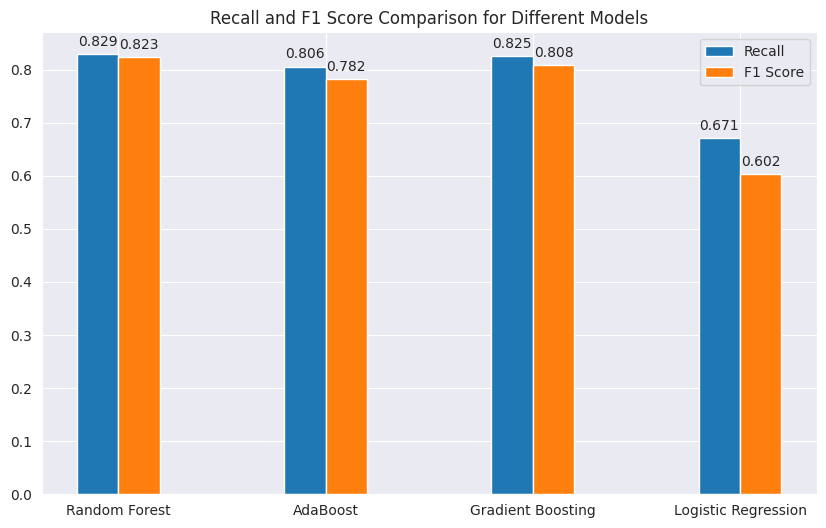

In [34]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
}

recall_scores = []
f1_scores = []

# Loop through models
for name, model in models.items():
    model.fit(X_train_v1, y_train_v1)
    y_pred = model.predict(X_test_v1)
    
    recall = recall_score(y_test_v1, y_pred)
    f1 = f1_score(y_test_v1, y_pred)
    
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.20
ind = np.arange(len(models))

bar1 = ax.bar(ind, recall_scores, width, label='Recall')
bar2 = ax.bar(ind + width, f1_scores, width, label='F1 Score')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(models.keys())
ax.legend()

# Add values on top of the bars
for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, f'{height:.3f}', ha='center', va='bottom')

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, f'{height:.3f}', ha='center', va='bottom')

plt.title('Recall and F1 Score Comparison for Different Models')
plt.show()


In [35]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

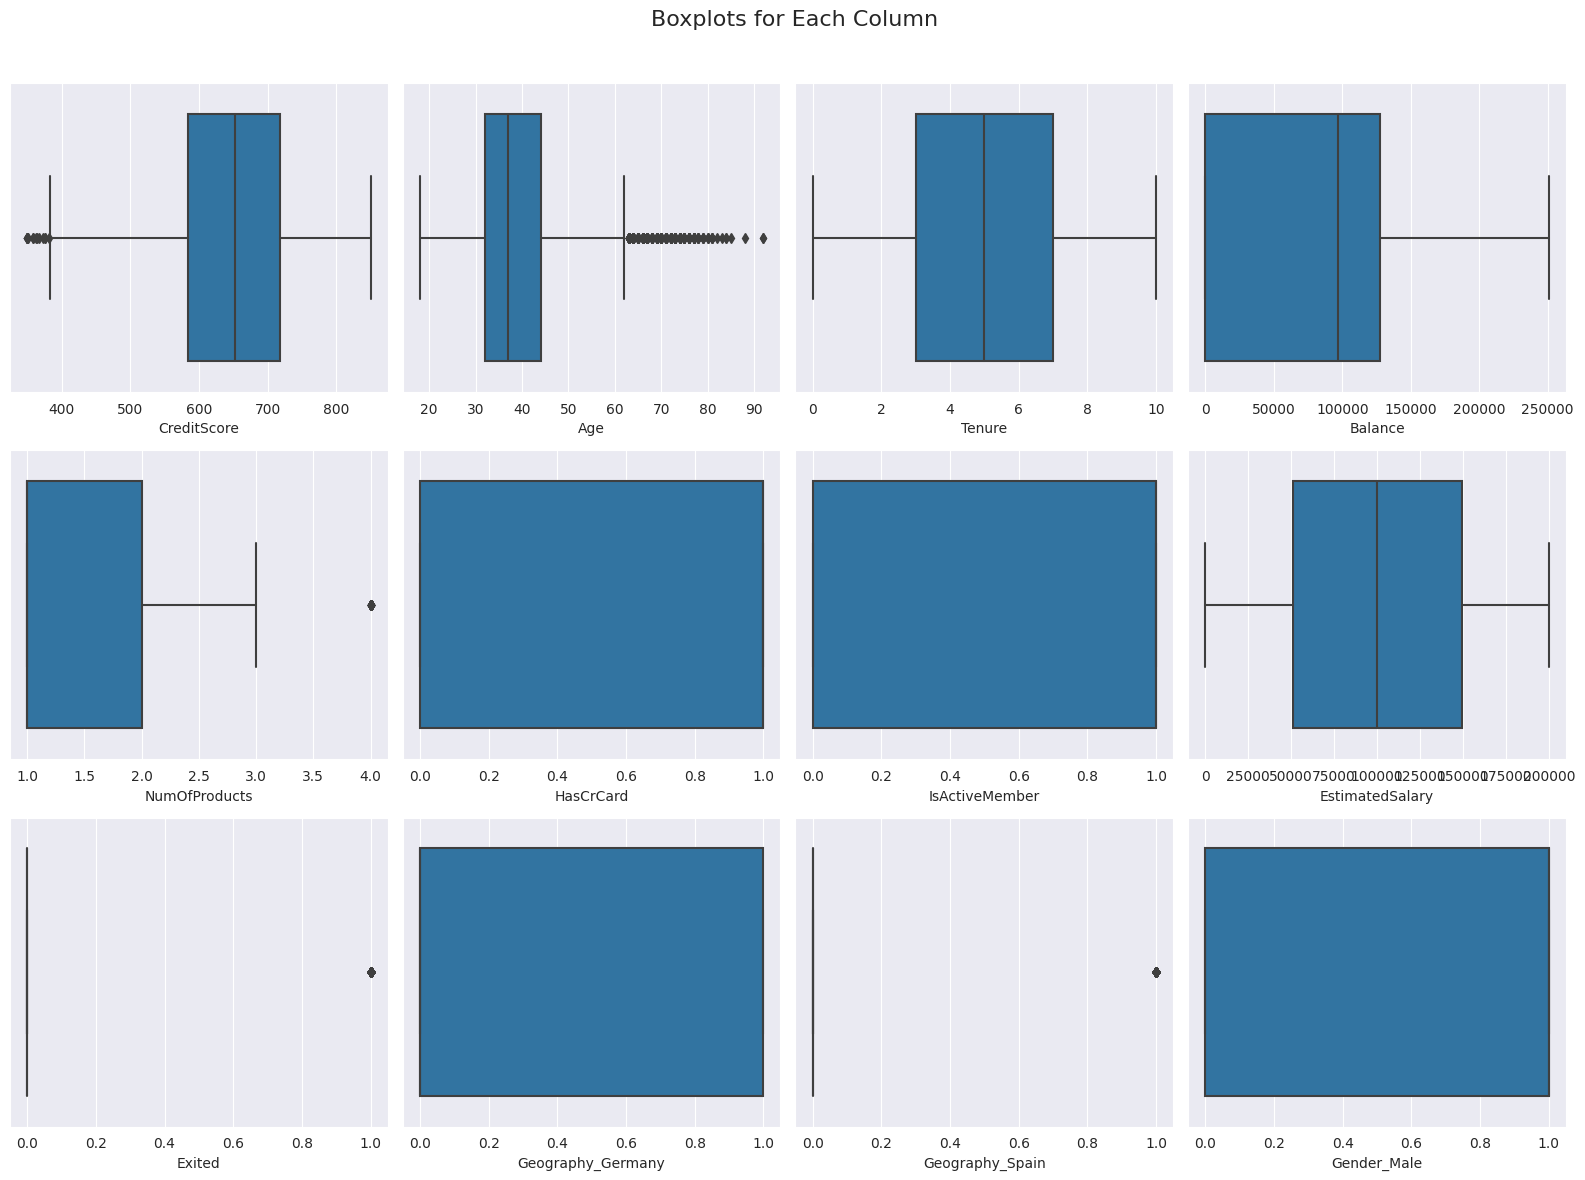

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                   'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
                   'Geography_Spain', 'Gender_Male']

# Plot boxplots for each column
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.suptitle('Boxplots for Each Column', fontsize=16)

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i // 4, i % 4])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [53]:
import pandas as pd

# Assuming df is your DataFrame
columns_to_filter = ['Age', 'CreditScore']

# Calculate the interquartile range (IQR) for each specified column
for column_name in columns_to_filter:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where the specified column is outside the bounds
    df_f = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Display the filtered DataFrame

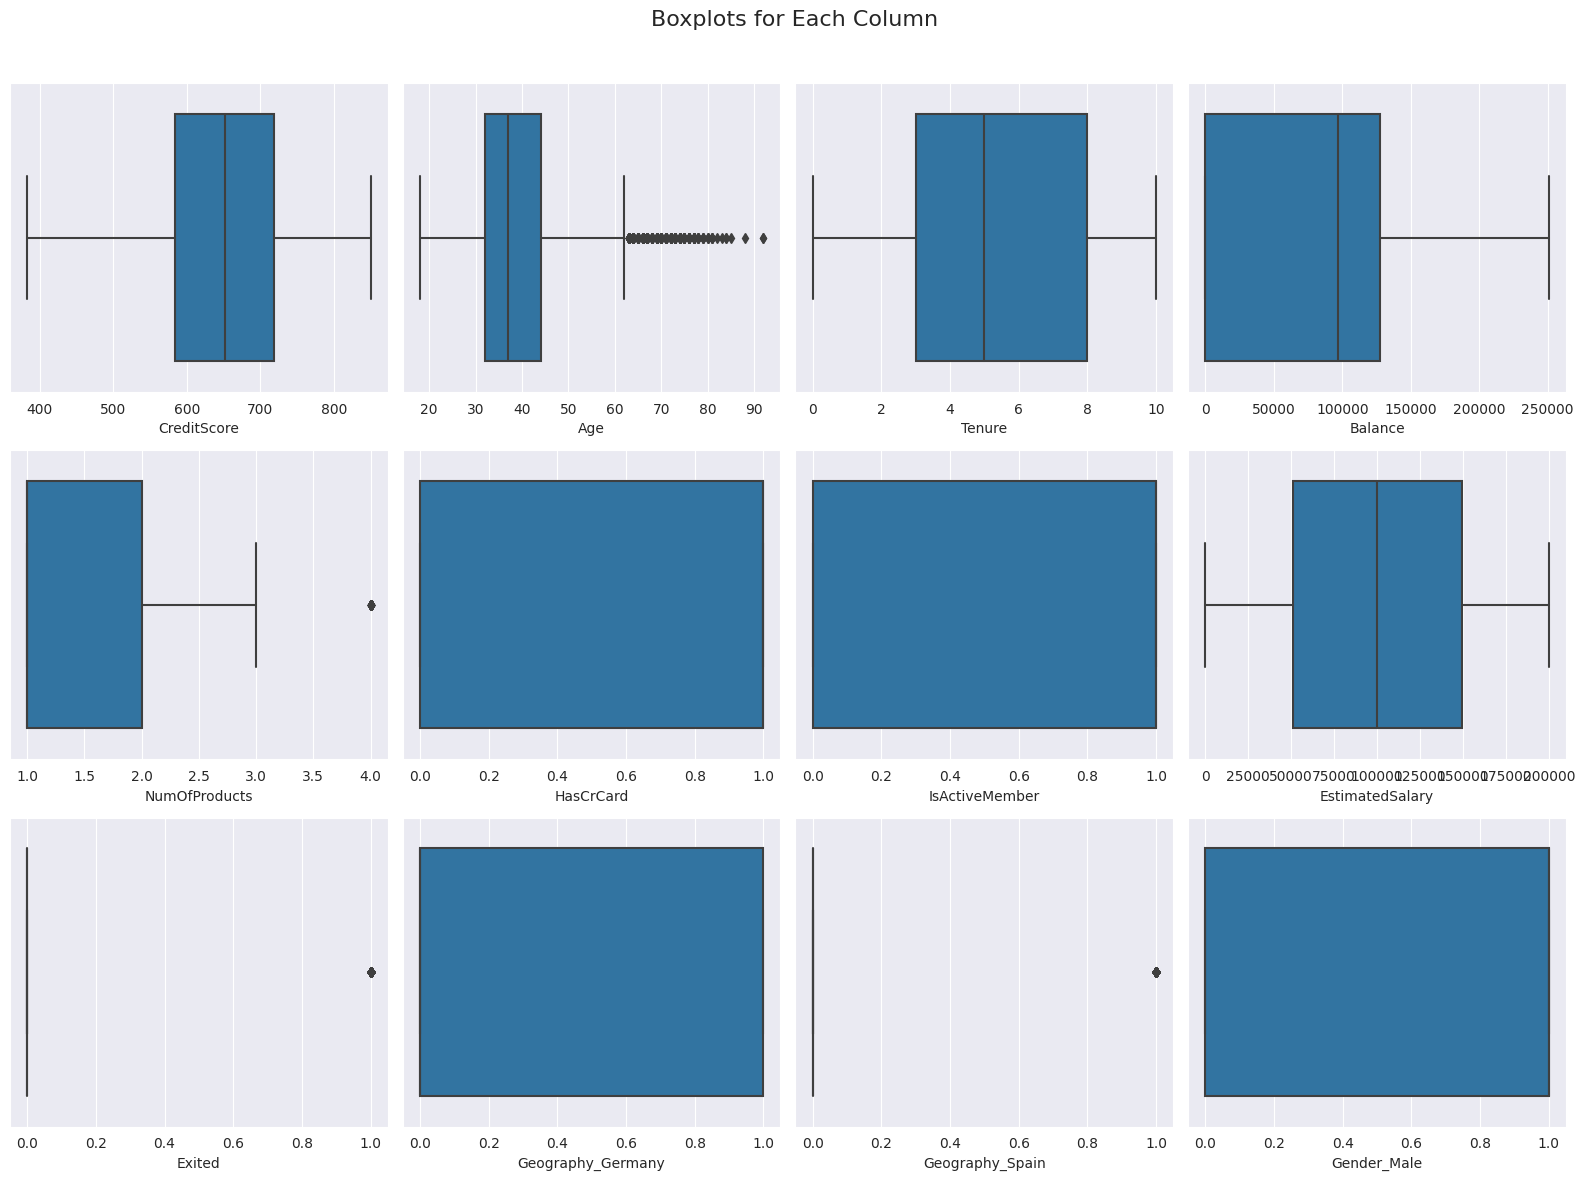

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                   'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
                   'Geography_Spain', 'Gender_Male']

# Plot boxplots for each column
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.suptitle('Boxplots for Each Column', fontsize=16)

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df_f[column], ax=axes[i // 4, i % 4])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [57]:
X2=df_f.drop(['Exited'],axis=1)
y2=df_f['Exited']
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X2,y2)
y_res.value_counts()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
X_train_v2.var(axis=0)

CreditScore          8.101018e+03
Age                  9.866629e+01
Tenure               7.424928e+00
Balance              3.750212e+09
NumOfProducts        3.260290e-01
HasCrCard            2.344424e-01
IsActiveMember       2.328355e-01
EstimatedSalary      3.334254e+09
Geography_Germany    1.850175e-01
Geography_Spain      1.443098e-01
Gender_Male          2.423593e-01
dtype: float64

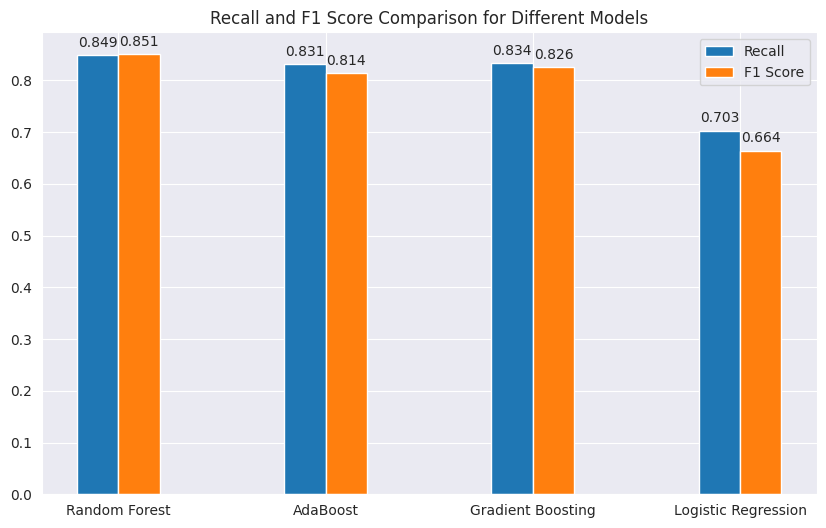

In [58]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
}

recall_scores = []
f1_scores = []

# Loop through models
for name, model in models.items():
    model.fit(X_train_v2, y_train_v2)
    y_pred = model.predict(X_test_v2)
    
    recall = recall_score(y_test_v2, y_pred)
    f1 = f1_score(y_test_v2, y_pred)
    
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.20
ind = np.arange(len(models))

bar1 = ax.bar(ind, recall_scores, width, label='Recall')
bar2 = ax.bar(ind + width, f1_scores, width, label='F1 Score')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(models.keys())
ax.legend()

# Add values on top of the bars
for i, rect in enumerate(bar1):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, f'{height:.3f}', ha='center', va='bottom')

for i, rect in enumerate(bar2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, f'{height:.3f}', ha='center', va='bottom')

plt.title('Recall and F1 Score Comparison for Different Models')
plt.show()

In [ ]:
# Hence Random Forest Turns out with Highest Recall and F1 score among all